# Determining an Education Website's Better Landing Page with an A/B Test 

The UX design team of a Data Science online education company has created a new landing page design showing their annual subscription plan. They are hoping that this new design will result in an increase in users deciding to buy their plan. We have been told that the average annual conversion rate (users choosing to buy the plan) of the old page is around 12%. The management would be happy to see an increase of 2% as a benchmark of success. This means that the new page will need to have a conversion rate of 14%. 

Before launching the new page, the management would like to conduct an initial test on a sample of the base users. As the resident Data Analysts, we have been assigned this task to see if the new page will perform better or worse than its predecessor. We decide to conduct an A/B test to figure this out. 

NOTE: This is a just a potential scenario. The dataset we will be using for this project can be downloaded from [Kaggle](https://www.kaggle.com/zhangluyuan/ab-testing). 

This is a personal project to practice A/B Testing.

### Results

The results of the test led us to fail to reject the Null Hypothesis. The new landing web page **did not perform much differently** than the old landing web page.

# Stating the hypothesis 

At the onset of the project, we need to state our hypothesis as this will be the basis for interpreting our test results. Since we do not know how the new landing page will perform, we will perform a **two-tailed test**. 

&emsp; H$_{o}$: p = p$_{o}$ (Null Hypothesis) <br>
&emsp; H$_{a}$: p ≠ p$_{o}$ (Alternative Hypothesis)

p is the conversion rate of the old page while p$_{o}$ is the conversion rate of the new page. 

# Planning our Analysis

Now that we have our hypotheses, we have to figure out how to test them. To do that, we will have to determine some important parameters. 

### Setting Up the Variables 

The test to be carried out on the base users will require an **Independent** variable and a **Dependent** variable. 

The Independent variable will be the base users divided into a **Control Group** and a **Treatment Group**. The Control Group will be shown the old landing page while the Treatment Group will be shown the new landing page. We need two groups to ensure that any potential change in conversion rate will be solely due to the new design and not to any other external factors. 

The Dependent variable, the variable that we are trying to measure, will be the conversion rate. We can measure this by representing each user's decision during their session with:

&emsp; `1` = The user subscribed to the annual plan <br>
&emsp; `0` = The user did not subscribe to the annual plan

### Significance Level 

For this project, we will set the [Significance Level](https://www.sciencedirect.com/topics/mathematics/significance-level-alpha) (α) at the standard 0.05 or 5%. This places the Confidence Level (1- α) at 0.95 or 95%. This will help us determine whether or not to reject the Null Hypothesis. If the probability (p-value) of observing an event as extreme is **less than** α, then we have to reject the Null Hypothesis. This means that there is a less than 5% probability that this event (conversion rate in our case) occurred by chance. 

Essentially, we want to be 95% confident that the new page's conversion rate is **statistically different** from the old page's conversion rate before we reject the Null Hypothesis and accept the Alternative Hypothesis. Hence, the name Confidence Level. 

### Power of the Test

Another parameter closely related to the Significance Level (α) is the [Power of the Test](https://www.statisticsteacher.org/2017/09/15/what-is-power/) (1 - β). This parameter gives us the probability of correctly rejecting the Null Hypothesis. This means that a high Power value gives us a higher chance of rejecting the Null Hypothesis when it is actually False. Standard values for this are 0.8 or 0.9. We will set ours at 0.9 

### Effect Size

The [Effect Size](https://www.leeds.ac.uk/educol/documents/00002182.htm#:~:text=Effect%20size%20is%20a%20simple,confounding%20this%20with%20sample%20size.) is "simply a way of quantifying the size of the difference between two groups". In this project, the difference being measured is that of the two conversion rates (14% and 12%). This value is NOT 2% and has to be computed. We will do this below. 

### Calculating the Sample Size

In real life, it would be impractical to conduct the test on the entire population of our base users since it would be resource-intensive. Our analysis has to be done on a sample instead. To [calculate the sample size](https://www.theanalysisfactor.com/5-steps-for-calculating-sample-size/), we will use the three parameters mentioned above. To sum it up, these are the values:

&emsp; Significance Level (α): 0.05 <br>
&emsp; Power of the Test (1 - β): 0.9 <br>
&emsp; Effect Size: To be computed

We can use the `statsmodels` package to help us compute for the Effect Size and then the Sample Size. 

In [1]:
import statsmodels.stats.api as sms


effect_size = sms.proportion_effectsize(0.12, 0.14) # Conversion rates in decimal form
effect_size

-0.05951079608252374

In [2]:
sample_size = sms.zt_ind_solve_power(
    effect_size, 
    nobs1 = None, # This is set to `None` as this is what we are computing for (Number of Observations)
    power=0.9, 
    alpha=0.05, 
    ratio=1
    )
print(f'Sample size needed: {round(sample_size)}')

Sample size needed: 5934


### Test to Use 

Above, we see that we need a sample size of almost 6000, which is quite a large number. Also, the two values which we will be comparing, the conversion rates, are also proportions. This is because they represent how many of (a proportion of) each group "converted" or bought the plan being offered. Given these, we shall conduct a [**Two Proportion Z-Test**](https://www.statisticshowto.com/z-test/). The results from this test will determine which Hypothesis to accept and which to reject. 

# Gathering and Cleaning the Data 

Since this is a fictional scenario, let us simulate conducting the test on a sample, by extracting our data from this [Kaggle data set](https://www.kaggle.com/zhangluyuan/ab-testing). The `csv` file for this data set will represent the entire population of our base users. We can open this using the `pandas` package. 

In [3]:
import pandas as pd

ab_data = pd.read_csv('ab_data.csv')
display(ab_data.head(10))
print(f'Number of Rows: {ab_data.shape[0]}')

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


Number of Rows: 294478


We have five columns in our data set:

1. `user_id`: Unique identifier for each user during their session
2. `timestamp`: The date and time during which each user conducted their session
3. `group`: Test group that each user belonged to
4. `landing_page`: Landing page version each user was exposed to
4. `converted`: Whether a user subscribed to the annual plan or not

Let's begin cleaning the data by identifying any anomalies present. First, we can look at each column's data type and check if there are any missing or null values. 

In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


All columns appear to have complete entries which lessens the work we have to do. The `timestamp` column is of the `object` data type. Since we will only be needing the last three columns, `group`, `landing_page`, and `converted`, for our analysis, there will be no need to convert the `timestamp` column to the `datetime` data type. 

As we mentioned, the Control Group will be exposed to the old page while the Treatment Group will be exposed to the new page. Let's construct a pivot table to see whether there have been some mix-ups in the data. 

In [5]:
import numpy as np

pd.pivot_table(ab_data, values = 'converted', index = 'group', columns = 'landing_page', aggfunc = np.size)

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


We can observe that a small part of each group of our population was exposed to the wrong web page. We need to drop the rows containing these mix-ups before sampling lest we run into erroneous test results. 

Before that, let's check if there are users that appear more than once. We can use the `user_id` column to check for this. We would want to only have one session per user recorded in the data set to ensure that each data point (each row) is unique. 

In [6]:
user_counts = ab_data['user_id'].value_counts(ascending = False)
user_counts

746755    2
722274    2
892271    2
736112    2
728134    2
         ..
700160    1
698113    1
704258    1
702211    1
630732    1
Name: user_id, Length: 290584, dtype: int64

In [7]:
duplicate_users = (user_counts > 1)
duplicate_users.sum()

3894

A total of 3894 users appear twice in the data set. We would also need to drop these duplicate user rows. 

The two scenarios above present us with a dilemma since we need to decide which of the two to execute first. Either we drop the rows with mix-ups first then drop those rows with duplicate users, or vice-versa. 

It is possible that a user might have appeared twice because they were exposed to both versions of the web page while being in the same group. This could also explain the mix-ups we observed. Let's try to confirm this below:

In [8]:
du = duplicate_users[duplicate_users == True].index

du_df = ab_data[ab_data['user_id'].isin(du)]
du_df.sort_values('user_id').head()

,user_id,timestamp,group,landing_page,converted
230259,630052,2017-01-17 01:16:05.208766,treatment,new_page,0
213114,630052,2017-01-07 12:25:54.089486,treatment,old_page,1
22513,630126,2017-01-14 13:35:54.778695,treatment,old_page,0
251762,630126,2017-01-19 17:16:00.280440,treatment,new_page,0
183371,630137,2017-01-20 02:08:49.893878,control,old_page,0


Our suspicion confirmed, let's consider the situation where we drop the mix-up rows first. If we choose to drop rows with mix-ups first (only those rows where users were exposed to the wrong page), we would retain the rows of those same users where they were exposed to the correct page. This would be defeating the purpose of our test as we want each user to be exposed to only the version of the web page proper to their group. We need to drop ALL the rows with duplicate users. 

Since dropping mix-up rows first risks tampering with our sampling, we shall proceed with dropping duplicate user rows first. We will use the indexes of these rows as reference for dropping.

In [9]:
ab_data.drop(labels = du_df.index, axis = 0, inplace = True)
ab_data.reset_index(inplace = True)
display(ab_data)

,index,user_id,timestamp,group,landing_page,converted
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...,...
286685,294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
286686,294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
286687,294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
286688,294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


The number of rows for `ab_data` has been decreased from 294478 to 286690. Let's now check if there are still remaining rows with mix-ups. 

In [10]:
pd.pivot_table(ab_data, values = 'converted', index = 'group', columns = 'landing_page', aggfunc = np.size)

landing_page,new_page,old_page
group,,
control,NaN,143293.0
treatment,143397.0,NaN


We can confirm that the mix-up rows have also been dropped along with those with duplicate users. 

### Sampling the Data 

Now that we've properly cleaned our data, we can now sample the data set for data on which to conduct our analysis.

In [11]:
# "Divide" the data set into two groups, `control` and `treatment`.
control = ab_data[(ab_data['group'] == 'control')]
treatment = ab_data[(ab_data['group'] == 'treatment')]

# `n` is set to 5934 as we previously calculated. `random_state` is set to `1` so that our results are reproducible
control_sample = control.sample(n = 5934, random_state = 1)
treatment_sample = treatment.sample(n = 5934, random_state = 1)

# Sub-samples are combined in a single dataframe
ab_sample = pd.concat([control_sample, treatment_sample])
ab_sample.head(10)

,index,user_id,timestamp,group,landing_page,converted
168136,172701,788447,2017-01-15 10:15:53.966766,control,old_page,0
253866,260721,644367,2017-01-04 13:27:00.815306,control,old_page,0
47143,48408,921476,2017-01-13 11:28:38.186516,control,old_page,0
263598,270742,844813,2017-01-09 02:20:49.471715,control,old_page,0
224896,230973,675390,2017-01-09 23:51:06.765370,control,old_page,0
34680,35614,668372,2017-01-08 19:08:01.505554,control,old_page,0
210542,216217,690587,2017-01-14 00:29:05.466481,control,old_page,0
276697,284190,890747,2017-01-20 04:04:10.418348,control,old_page,0
168219,172787,638406,2017-01-08 15:44:07.768157,control,old_page,0
200777,206192,818494,2017-01-06 08:01:01.834029,control,old_page,0


Below, we construct again a pivot table as a sanity check. 

In [12]:
pd.pivot_table(ab_sample, values = 'converted', index = 'group', columns = 'landing_page', aggfunc = np.size)

landing_page,new_page,old_page
group,,
control,NaN,5934.0
treatment,5934.0,NaN


# Analyzing the Data

Let's start our analysis by computing and visualizing the conversion rates of the two groups for the sample data. 

<ipython-input-13-bed7406f2581>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [x for x in range(0,14,2)], fontsize = 15)


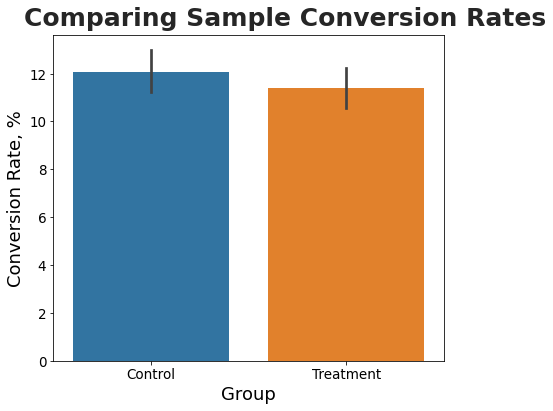

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (7,6))
sns.barplot(x = 'group', y = 'converted', data = ab_sample)
sns.set_style('white')

# Styling the graph elements
plt.text(x = -0.65, y = 0.14, s = 'Comparing Sample Conversion Rates', fontsize = 25, weight = 'bold')
ax.set_xlabel('Group', fontsize = 18)
ax.set_ylabel('Conversion Rate, %', fontsize = 18)
ax.set_xticklabels(labels = ['Control', 'Treatment'], fontsize = 15)
ax.set_yticklabels(labels = [x for x in range(0,14,2)], fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=13.5)
plt.show()

In [14]:
control_sample['converted'].mean()

0.12082912032355915

From the sample, the old landing page's conversion rate of ~12.1% is almost the same as the 12% annual figure which we were told about.  

In [15]:
treatment_sample['converted'].mean()

0.11375126390293225

Unfortunately, we see that the new landing page seemed to perform worse at ~11.38% than the old landing page. We need to figure out, though, if this is statistically significant enough for us to reject the Null Hypothesis and to claim that the new page actually did perform worse. 

To do this, we have to compute two things:
1. Test Statistic (z-statistic)
2. P-value

Normally, we would have to compute for the standard deviation or the standard error before computing the test statistic. Fortunately, `statsmodels` can take care of that for us behind the scenes so we can skip this intermediary step. We will also compute for the confidence intervals.

In [16]:
zstat, p_value = sms.proportions_ztest(
    count = [treatment_sample['converted'].sum(), control_sample['converted'].sum()],
    nobs = [treatment_sample.shape[0], control_sample.shape[0]],
    alternative = 'two-sided' # For two-tailed test
    )

(lower_bounds), (upper_bounds) = sms.proportion_confint(
    count = [treatment_sample['converted'].sum(), control_sample['converted'].sum()],
    nobs = [treatment_sample.shape[0], control_sample.shape[0]],
    alpha = 0.05
    )

print(f'Test Statistic (z-statistic): {zstat}') 
print(f'P-value: {p_value}')  
print(f'Confidence Interval, 95% (Control Group): [{lower_bounds[1]}, {upper_bounds[1]}]')
print(f'Confidence Interval, 95% (Treatment Group): [{lower_bounds[0]}, {upper_bounds[0]}]')

Test Statistic (z-statistic): -1.1981762220288936
P-value: 0.2308484201886838
Confidence Interval, 95% (Control Group): [0.11253640467000654, 0.12912183597711174]
Confidence Interval, 95% (Treatment Group): [0.10567277282125923, 0.12182975498460527]


# Interpreting the Results 

Traditionally, the p-value is found using a z-table after we've calculated the z-value. In our case, `statsmodels` was able to compute for both directly. 

We see that our p-value is at 0.2308; our observed treatment conversion rate has a 23.08% probability of occuring due to chance. Since this is higher than our significance level (α) of 0.05, we fail to reject the Null Hypothesis, H$_{o}$. This means that the new landing web page **did not perform much differently** than the old landing web page. Hence, the conversion rates are not significantly different from each other. 

Having performed the test on a sample, the true conversion rate (population conversion rate) would also not be that far from 11.38%. It is most likely to fall within the bounds of 10.57% and 12.18% as shown in the Treatment Group's confidence interval. This shows that the new web page's conversion rate falls short of the 14% target of the management.

We can now relay the results of our test to the management so that they can decide whether to have the UX design team create a new design or to come up with a different approach. 